In [1]:
import os
import pandas as pd
import numpy as np
import pymc3 as pm
from sklearn.metrics import log_loss, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
base_dir = os.path.join("/Users", "sbussmann", "Development", "buda", "buda-ratings")
interim_dir = os.path.join(base_dir, 'data', 'interim')

In [3]:
league_id = 40264
winloss = pd.read_csv(os.path.join(interim_dir, "winloss_divprior_{}.csv".format(league_id)))

In [4]:
winloss.head()

,Team A,Team B,Team A Wins,Index A,Index B,Div A,Div B
0,AHOC,Gothrilla,True,0,1,4/3 Div 1,4/3 Div 1
1,AHOC,BBN,True,0,9,4/3 Div 1,4/3 Div 1
2,AHOC,Stonecutters,True,0,41,4/3 Div 1,5/2 Div 1
3,AHOC,FlowChart,True,0,2,4/3 Div 1,4/3 Div 1
4,AHOC,Lady and the BAMF,True,0,28,4/3 Div 1,4/3 Div 2


In [8]:
plusminus = pd.read_csv(os.path.join(interim_dir, 'plusminus_{}.csv'.format(league_id)), index_col='Team Name')

In [9]:
winpct = plusminus['Wins'] / (plusminus['Wins'] + plusminus['Losses'])

In [10]:
plusminus = plusminus.assign(winpercent = winpct)

In [15]:
plusminus.head()

,PlusMinus,divname,Wins,Losses,Ties,winpercent
Team Name,,,,,,
123 Trap!,-81,4/3 Div 3,1,9,0,0.100000
215 Needham Street,36,Open Div 1,5,1,1,0.833333
A Lil Bit Sticky,-43,4/3 Div 2,5,10,0,0.333333
AHOC,100,4/3 Div 1,14,0,0,1.000000
Alpha No Beta,-7,5/2 Div 3,10,9,0,0.526316


In [34]:
mixed = plusminus[plusminus["divname"].apply(lambda x: x[0:4] != "Open")]

In [35]:
strippeddiv = mixed["divname"].apply(lambda x: x[4:])

In [33]:
strippeddiv.head()

Team Name
123 Trap!              Div 3
215 Needham Street     Div 1
A Lil Bit Sticky       Div 2
AHOC                   Div 1
Alpha No Beta          Div 3
Name: divname, dtype: object

In [37]:
mixed = mixed.assign(divname = strippeddiv) 

In [38]:
mixed.columns

Index([u'PlusMinus', u'divname', u'Wins', u'Losses', u'Ties', u'winpercent'], dtype='object')

In [39]:
mixed = mixed.drop(["PlusMinus", "Ties"], axis=1)

In [40]:
mixed = mixed.rename(columns = {"divname": "Division", "winpercent": "Win Percentage"})

In [43]:
mixed.sort_values("Win Percentage", ascending=False).head(10)

,Division,Wins,Losses,Win Percentage
Team Name,,,,
AHOC,Div 1,14,0,1.000000
SnakeCountryBromance,Div 1,5,0,1.000000
Injustice League,Div 2,14,1,0.933333
Pink Flamingos,Div 2,10,1,0.909091
Too Drunk to Fail,Div 3,11,2,0.846154
Jack's Abby HAOS Lager,Div 2,10,2,0.833333
Maverick,Div 2,9,2,0.818182
JuJu Hex,Div 2,11,3,0.785714
Upstream,Div 2,20,6,0.769231


In [25]:
totaldf = plusminus.join(ratingsdf, how='inner')

In [26]:
totaldf.sort_values('mean_rating', ascending=False)

,PlusMinus,divname,Wins,Losses,Ties,mean_rating
AHOC,100,4/3 Div 1,14,0,0,4.605007
SnakeCountryBromance,33,5/2 Div 1,5,0,0,4.021910
Zerg Rush!,22,4/3 Div 1,10,4,0,3.385708
Gothrilla,47,4/3 Div 1,12,4,1,3.322208
FlowChart,29,4/3 Div 1,12,4,0,3.158624
Stonecutters,24,5/2 Div 1,8,4,1,2.883591
GrassBurner,29,4/3 Div 1,11,8,2,2.378695
Injustice League,100,4/3 Div 2,14,1,0,2.259190
Swingers,-6,4/3 Div 1,5,7,1,2.156590
TuneSquad,-9,4/3 Div 1,6,7,1,1.994202


In [27]:
totaldf.groupby('divname').mean()

,PlusMinus,Wins,Losses,Ties,mean_rating
divname,,,,,
4/3 Div 1,11.400000,8.300000,6.500000,0.600000,2.550637
4/3 Div 2,2.727273,9.136364,8.818182,0.090909,0.225156
4/3 Div 3,-14.375000,6.625000,7.625000,0.125000,-1.134833
5/2 Div 1,7.666667,5.333333,3.666667,1.333333,2.798892
5/2 Div 2,17.818182,7.363636,4.909091,0.181818,0.659714
5/2 Div 3,-22.076923,6.307692,10.153846,0.076923,-1.468272


In [28]:
trace['ratings'].shape

(4000, 67)

In [29]:
def get_index(team_name, df):
    team_index = df.loc[team_name, 'Index']
    
    return team_index

In [30]:
def calc_prob(indexA, indexB, trace):
    
#     sharpness = trace['sharpness']
    deltaRating = trace['ratings'][:, indexA] - trace['ratings'][:, indexB]
    probAWins = 1. / (1 + np.exp(-deltaRating))
    return probAWins.mean()

In [31]:
simprobs = calc_prob(0, 1, trace)

In [32]:
simprobs

0.75384966836323386

In [33]:
winloss_with_dup = pd.read_csv(os.path.join(interim_dir, 'winloss_with_duplicates.csv'))

In [34]:
winloss_with_dup['predicted'] = winloss_with_dup.apply(lambda x: calc_prob(x['Index A'], x['Index B'], trace), axis=1)

In [35]:
winloss_with_dup.head()

,Team A,Team B,divname,Team A Wins,Index A,Index B,Div A,Div B,predicted
0,AHOC,Gothrilla,4/3 Div 1,True,0,1,4/3 Div 1,4/3 Div 1,0.753850
1,AHOC,BBN,4/3 Div 1,True,0,9,4/3 Div 1,4/3 Div 1,0.939327
2,AHOC,Stonecutters,4/3 Div 1,True,0,41,4/3 Div 1,5/2 Div 1,0.815489
3,AHOC,FlowChart,4/3 Div 1,True,0,2,4/3 Div 1,4/3 Div 1,0.780551
4,AHOC,Lady and the BAMF,4/3 Div 1,True,0,28,4/3 Div 1,4/3 Div 2,0.994518


In [36]:
winloss_with_dup['predBin'] = winloss_with_dup['predicted'].apply(lambda x: np.round(x, 1))

In [37]:
winloss_with_dup.head()

,Team A,Team B,divname,Team A Wins,Index A,Index B,Div A,Div B,predicted,predBin
0,AHOC,Gothrilla,4/3 Div 1,True,0,1,4/3 Div 1,4/3 Div 1,0.753850,0.8
1,AHOC,BBN,4/3 Div 1,True,0,9,4/3 Div 1,4/3 Div 1,0.939327,0.9
2,AHOC,Stonecutters,4/3 Div 1,True,0,41,4/3 Div 1,5/2 Div 1,0.815489,0.8
3,AHOC,FlowChart,4/3 Div 1,True,0,2,4/3 Div 1,4/3 Div 1,0.780551,0.8
4,AHOC,Lady and the BAMF,4/3 Div 1,True,0,28,4/3 Div 1,4/3 Div 2,0.994518,1.0


In [38]:
binned = winloss_with_dup.groupby('predBin').mean()
binnedstd = winloss_with_dup.groupby('predBin').std()
binnedhi = binned + binnedstd
binnedlo = binned - binnedstd

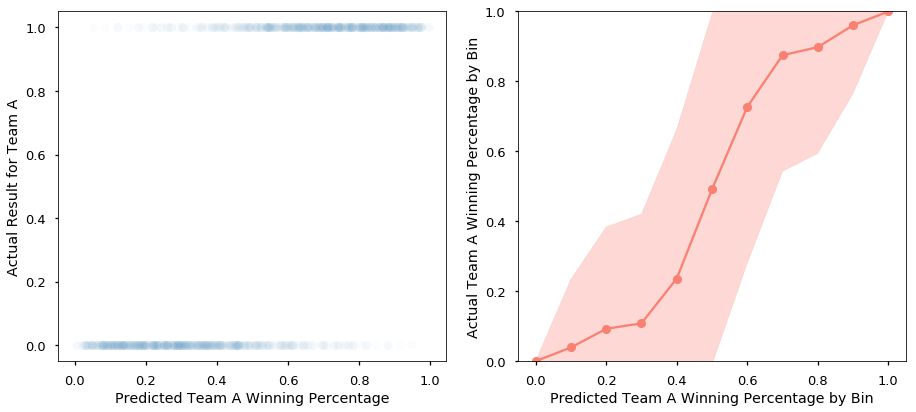

In [52]:
sns.set_context('talk')
f, axes = plt.subplots(1, 2, figsize=(13, 6))
ax = axes[0]
ax.plot(winloss_with_dup['predicted'], winloss_with_dup['Team A Wins'], 'o', alpha=0.02)
ax.set_ylabel('Actual Result for Team A')
ax.set_xlabel('Predicted Team A Winning Percentage')

ax = axes[1]
ax.plot(binned['Team A Wins'], 'o-', color='salmon')
ax.fill_between(binned.index, binnedlo['Team A Wins'], binnedhi['Team A Wins'], alpha=0.3, color='salmon')
ax.set_ylim([0, 1])
ax.set_ylabel('Actual Team A Winning Percentage by Bin')
ax.set_xlabel('Predicted Team A Winning Percentage by Bin')
plt.tight_layout()

In [40]:
team_log_loss = winloss_with_dup.groupby('Team A').apply(
    lambda x: log_loss(x['Team A Wins'].astype('int'), x['predicted'], labels=[0, 1]))

In [41]:
team_accuracy = winloss_with_dup.groupby('Team A').apply(
    lambda x: accuracy_score(x['Team A Wins'].astype('int'), np.round(x['predicted'])))

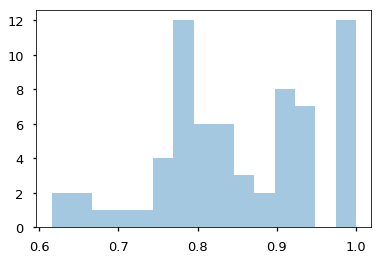

In [42]:
sns.distplot(team_accuracy, kde=False, bins=15)

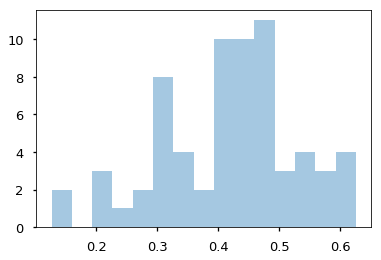

In [43]:
sns.distplot(team_log_loss, kde=False, bins=15)

In [44]:
log_loss(winloss_with_dup['Team A Wins'].astype('int'), winloss_with_dup['predicted'])

0.42387174710933295

In [45]:
accuracy_score(winloss_with_dup['Team A Wins'].astype('int'), np.round(winloss_with_dup['predicted']))

0.84482758620689657

In [46]:
def inspect(full_outcomes, team_name):
    index = full_outcomes['Team A'] == team_name
    outcomes_index = full_outcomes[index]
    return outcomes_index.drop(['divname', 'Index A', 'Index B', 'predBin'], axis=1)

In [47]:
ins = inspect(winloss_with_dup, 'Injustice League')
ins

,Team A,Team B,Team A Wins,Div A,Div B,predicted
180,Injustice League,Turtle Boy,True,4/3 Div 2,4/3 Div 1,0.625565
181,Injustice League,A Lil Bit Sticky,True,4/3 Div 2,4/3 Div 2,0.909555
182,Injustice League,Jack's Abby HAOS Lager,True,4/3 Div 2,4/3 Div 2,0.623313
183,Injustice League,Hipster Kitties,True,4/3 Div 2,4/3 Div 2,0.966696
184,Injustice League,Moose Lightning,True,4/3 Div 2,4/3 Div 2,0.905314
185,Injustice League,Tubbs,True,4/3 Div 2,4/3 Div 2,0.968430
186,Injustice League,Booooooosh!,True,4/3 Div 2,4/3 Div 2,0.881918
187,Injustice League,"Live Poultry, Fresh Killed (LPFK)",True,4/3 Div 2,4/3 Div 1,0.711632
188,Injustice League,Zerg Rush!,False,4/3 Div 2,4/3 Div 1,0.272828
189,Injustice League,Dominion,True,4/3 Div 2,4/3 Div 2,0.857745


In [48]:
ins = inspect(winloss_with_dup, 'Gothrilla')
ins

,Team A,Team B,Team A Wins,Div A,Div B,predicted
14,Gothrilla,AHOC,False,4/3 Div 1,4/3 Div 1,0.246150
15,Gothrilla,Swingers,False,4/3 Div 1,4/3 Div 1,0.740581
16,Gothrilla,FlowChart,True,4/3 Div 1,4/3 Div 1,0.536938
17,Gothrilla,Hucky McThrowandcatch,True,4/3 Div 1,5/2 Div 2,0.919490
18,Gothrilla,SnakeCountryBromance,False,4/3 Div 1,5/2 Div 1,0.351772
19,Gothrilla,Zerg Rush!,False,4/3 Div 1,4/3 Div 1,0.484232
20,Gothrilla,GrassBurner,True,4/3 Div 1,4/3 Div 1,0.703323
21,Gothrilla,Turtle Boy,True,4/3 Div 1,4/3 Div 1,0.812446
22,Gothrilla,"Live Poultry, Fresh Killed (LPFK)",True,4/3 Div 1,4/3 Div 1,0.867870
23,Gothrilla,Upstream,True,4/3 Div 1,4/3 Div 2,0.807672


In [49]:
ins = inspect(winloss_with_dup, 'SnakeCountryBromance')
ins

,Team A,Team B,Team A Wins,Div A,Div B,predicted
666,SnakeCountryBromance,Shake and Bake,True,5/2 Div 1,5/2 Div 1,0.902748
667,SnakeCountryBromance,Zerg Rush!,True,5/2 Div 1,4/3 Div 1,0.633774
668,SnakeCountryBromance,GrassBurner,True,5/2 Div 1,4/3 Div 1,0.809113
669,SnakeCountryBromance,Gothrilla,True,5/2 Div 1,4/3 Div 1,0.648228
670,SnakeCountryBromance,SHRedline,True,5/2 Div 1,5/2 Div 2,0.964139


In [50]:
ins = inspect(winloss_with_dup, 'Store Bought Dirt')
ins

,Team A,Team B,Team A Wins,Div A,Div B,predicted
344,Store Bought Dirt,Upstream,False,4/3 Div 2,4/3 Div 2,0.177662
345,Store Bought Dirt,M.O.B.,True,4/3 Div 2,5/2 Div 3,0.877966
346,Store Bought Dirt,Disc Envy,False,4/3 Div 2,4/3 Div 2,0.477964
347,Store Bought Dirt,Underwater Monkey Cowboys,True,4/3 Div 2,4/3 Div 3,0.806559
348,Store Bought Dirt,Toads,True,4/3 Div 2,4/3 Div 2,0.422908
349,Store Bought Dirt,JHOP,False,4/3 Div 2,4/3 Div 2,0.386841
350,Store Bought Dirt,Nerd Alert,True,4/3 Div 2,4/3 Div 2,0.630104
351,Store Bought Dirt,Dominion,False,4/3 Div 2,4/3 Div 2,0.463161
352,Store Bought Dirt,Fetch,True,4/3 Div 2,4/3 Div 2,0.531383
353,Store Bought Dirt,Flaming Croissants,True,4/3 Div 2,4/3 Div 2,0.346463


In [44]:
1. / (1. + np.exp(-2))

0.88079707797788231